In [1]:
import sys
sys.path.append('src/utils')

In [2]:
import preprocessing as prep
import glicko as glk
import elo as elo
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = prep.load_data()
df = prep.get_target(df)

Successfully concatenated 57 files.
Combined DataFrame shape: (194996, 49)
  tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0  1968-2029       Dublin   Grass       32.0             A      19680708   
1  1968-2029       Dublin   Grass       32.0             A      19680708   
2  1968-2029       Dublin   Grass       32.0             A      19680708   
3  1968-2029       Dublin   Grass       32.0             A      19680708   
4  1968-2029       Dublin   Grass       32.0             A      19680708   

   match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
0        270     112411          NaN          NaN  ...     NaN      NaN   
1        271     126914          NaN          NaN  ...     NaN      NaN   
2        272     209523          NaN          NaN  ...     NaN      NaN   
3        273     100084          NaN          NaN  ...     NaN      NaN   
4        274     100132          NaN          NaN  ...     NaN      NaN   

   l_2ndWon l_SvG

In [4]:
df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')

df = df[df['tourney_date'].dt.year >= 2000]

In [5]:
df = elo.calculate_general_elo(df)
df_elo = df[['tourney_date', 'surface', 'player_A_id', 'player_A_name', 'player_B_id', 'player_B_name', 'A_Elo_Overall', 'B_Elo_Overall', 'A_Elo_Surface', 'B_Elo_Surface', 'target']]

In [6]:
df_elo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74906 entries, 0 to 74905
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tourney_date   74906 non-null  datetime64[ns]
 1   surface        74853 non-null  object        
 2   player_A_id    74906 non-null  int64         
 3   player_A_name  74906 non-null  object        
 4   player_B_id    74906 non-null  int64         
 5   player_B_name  74906 non-null  object        
 6   A_Elo_Overall  74906 non-null  float64       
 7   B_Elo_Overall  74906 non-null  float64       
 8   A_Elo_Surface  74906 non-null  float64       
 9   B_Elo_Surface  74906 non-null  float64       
 10  target         74906 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 6.3+ MB


In [7]:
df_elo

,tourney_date,surface,player_A_id,player_A_name,player_B_id,player_B_name,A_Elo_Overall,B_Elo_Overall,A_Elo_Surface,B_Elo_Surface,target
0,2000-01-03,Hard,103096,Arnaud Clement,102358,Thomas Enqvist,1250.000000,1250.000000,1250.000000,1250.000000,0
1,2000-01-03,Hard,103819,Roger Federer,102533,Jens Knippschild,1250.000000,1250.000000,1250.000000,1250.000000,1
2,2000-01-03,Hard,101885,Wayne Arthurs,102998,Jan Michael Gambill,1250.000000,1250.000000,1250.000000,1250.000000,0
3,2000-01-03,Hard,103206,Sebastien Grosjean,102776,Andrew Ilie,1250.000000,1250.000000,1250.000000,1250.000000,1
4,2000-01-03,Hard,102401,Scott Draper,102796,Magnus Norman,1250.000000,1250.000000,1250.000000,1250.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
74901,2024-12-18,Hard,209414,Luca Van Assche,210506,Alex Michelsen,1239.226226,1368.076202,1216.616692,1314.768325,0
74902,2024-12-18,Hard,210506,Alex Michelsen,210460,Nishesh Basavareddy,1373.238252,1250.000000,1318.392224,1250.000000,1
74903,2024-12-18,Hard,209992,Juncheng Shang,209414,Luca Van Assche,1351.017480,1234.064176,1275.529665,1212.992793,0
74904,2024-12-18,Hard,210460,Nishesh Basavareddy,209992,Juncheng Shang,1239.448710,1340.421837,1241.943449,1269.639282,1


In [8]:
import matplotlib as mpl

plt.style.use("dark_background")
mpl.rcParams.update({
    "axes.facecolor": "#111111",
    "figure.facecolor": "#111111",
    "axes.edgecolor": "#CCCCCC",
    "axes.labelcolor": "#FFFFFF",
    "xtick.color": "#BBBBBB",
    "ytick.color": "#BBBBBB",
    "grid.color": "#FFFFFF",
    "text.color": "#FFFFFF",
    "legend.edgecolor": "#333333",
})

# --- Vibrant color palette ---
colors = plt.cm.tab10.colors + plt.cm.Set2.colors + plt.cm.Set3.colors

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

_BASE_COLORS = list(plt.cm.tab10.colors) + list(plt.cm.Set2.colors) + list(plt.cm.Dark2.colors)
_PLAYER_COLOR_MAP = {}

def _get_player_color(name: str):
    if name not in _PLAYER_COLOR_MAP:
        _PLAYER_COLOR_MAP[name] = _BASE_COLORS[len(_PLAYER_COLOR_MAP) % len(_BASE_COLORS)]
    return _PLAYER_COLOR_MAP[name]

def plot_players_elo(
    df_elo: pd.DataFrame,
    K: int = 6,
    figsize=(10, 6),
    agg: str = "last",
    title: str = "Elo Evolution of Top Players",
    surface: str | None = None,
    min_matches: int = 30,
):
    plt.style.use("dark_background")
    mpl.rcParams.update({
        "axes.facecolor":"#111111","figure.facecolor":"#111111",
        "axes.edgecolor":"#CCCCCC","axes.labelcolor":"#FFFFFF",
        "xtick.color":"#BBBBBB","ytick.color":"#BBBBBB",
        "grid.color":"#FFFFFF","text.color":"#FFFFFF","legend.edgecolor":"#333333",
    })

    df = df_elo.copy()

    use_surface = surface is not None and {"A_Elo_Surface","B_Elo_Surface"}.issubset(df.columns)
    a_elo_col = "A_Elo_Surface" if use_surface else "A_Elo_Overall"
    b_elo_col = "B_Elo_Surface" if use_surface else "B_Elo_Overall"

    if surface is not None and "surface" in df.columns:
        df = df[df["surface"] == surface].copy()

    if not pd.api.types.is_datetime64_any_dtype(df["tourney_date"]):
        df["tourney_date"] = pd.to_datetime(df["tourney_date"], errors="coerce")
    df = df.dropna(subset=["tourney_date"])

    a = df[["tourney_date","player_A_id","player_A_name",a_elo_col]].rename(
        columns={"player_A_id":"player_id","player_A_name":"player_name",a_elo_col:"Elo"}
    )
    b = df[["tourney_date","player_B_id","player_B_name",b_elo_col]].rename(
        columns={"player_B_id":"player_id","player_B_name":"player_name",b_elo_col:"Elo"}
    )
    long = pd.concat([a,b], ignore_index=True)

    match_counts = (long.groupby(["player_id","player_name"])
                         .size()
                         .reset_index(name="matches"))

    if agg == "mean":
        per_day = long.groupby(["player_id","player_name","tourney_date"], as_index=False)["Elo"].mean()
    else:
        per_day = long.groupby(["player_id","player_name","tourney_date"], as_index=False)["Elo"].last()

    # >>> PEAK Elo ranking with min_matches <<<
    career_peak = (
        per_day.groupby(["player_id", "player_name"])["Elo"]
               .max()
               .reset_index(name="Elo_peak")
               .merge(match_counts, on=["player_id", "player_name"], how="left")
    )
    career_peak = career_peak[career_peak["matches"] >= min_matches] \
                           .sort_values("Elo_peak", ascending=False)

    if career_peak.empty:
        raise ValueError("No players meet the minimum match threshold after filtering.")

    top = career_peak.head(K)
    top_names = set(top["player_name"])
    best_name = top.iloc[0]["player_name"]

    top_data = per_day[per_day["player_name"].isin(top_names)].sort_values(["player_name","tourney_date"])

    fig, ax = plt.subplots(figsize=figsize)
    for name, g in top_data.groupby("player_name"):
        color = _get_player_color(name)
        alpha = 1.0 if name == best_name else 0.3
        lw = 2 if name == best_name else 1.5
        ax.plot(g["tourney_date"], g["Elo"], label=name, color=color, linewidth=lw, alpha=alpha)

    suffix = f" — {surface}" if surface else ""
    ylabel = "Elo Rating (Surface)" if use_surface else "Elo Rating (Overall)"
    ax.set_title(f"{title}{suffix}", fontsize=14, weight="bold")
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.legend(title="Player", loc="upper left", facecolor="#1C1C1C", framealpha=0.8)
    ax.grid(True, linestyle="--", alpha=0.4)
    fig.tight_layout()
    plt.show()
    return fig, ax


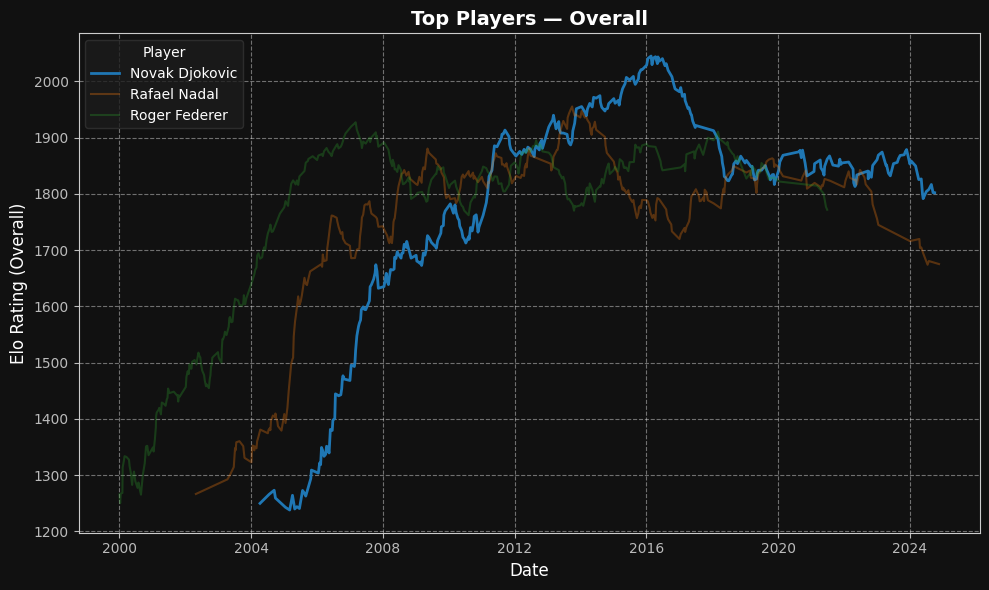

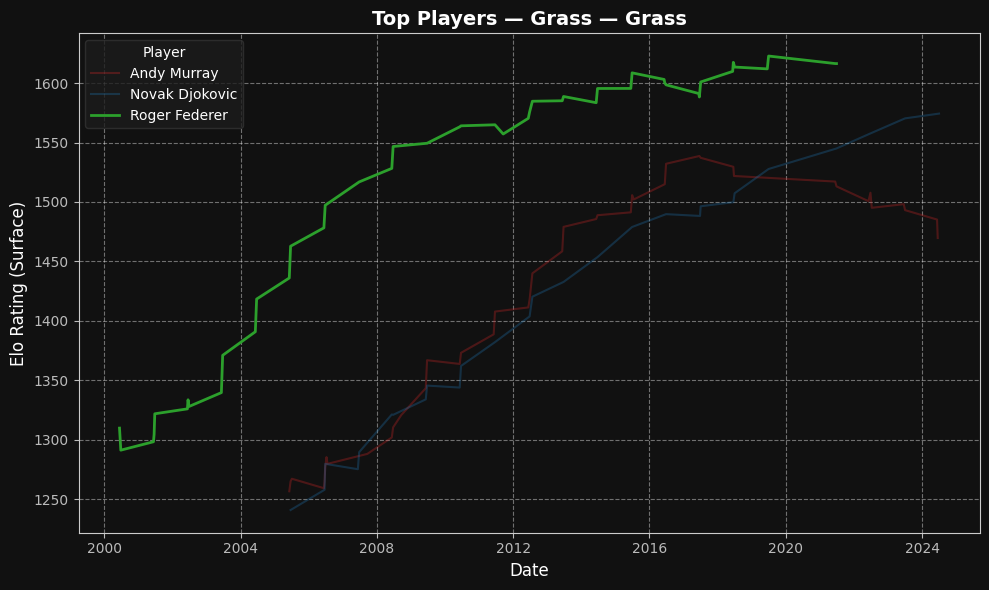

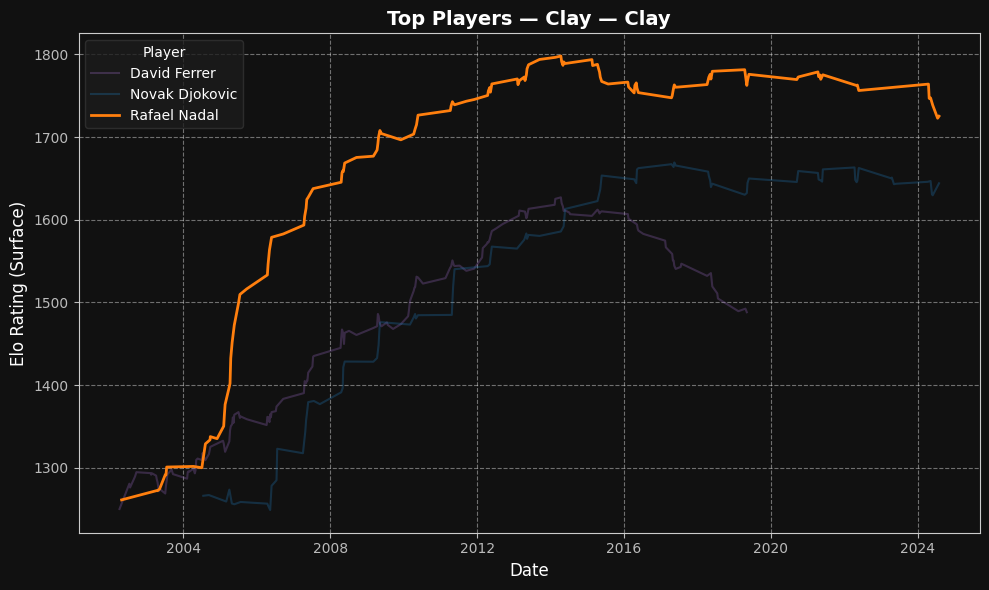

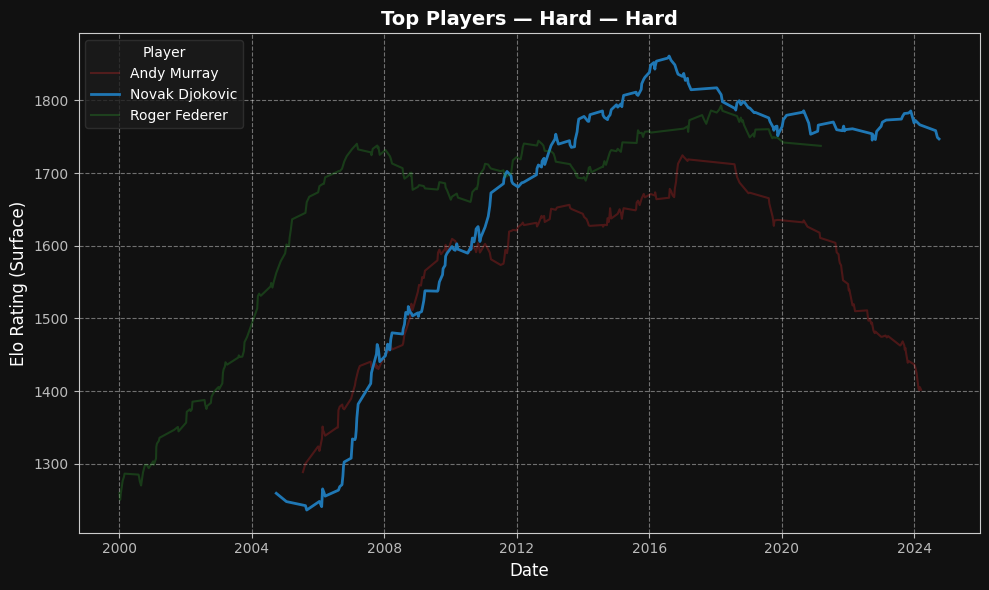

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Top Players — Hard — Hard'}, xlabel='Date', ylabel='Elo Rating (Surface)'>)

In [10]:
plot_players_elo(df_elo, K=3, figsize=(10,6), agg="last", title="Top Players — Overall", min_matches=50)
plot_players_elo(df_elo, K=3, figsize=(10,6), agg="last", title="Top Players — Grass", surface="Grass", min_matches=40)
plot_players_elo(df_elo, K=3, figsize=(10,6), agg="last", title="Top Players — Clay", surface="Clay", min_matches=40)
plot_players_elo(df_elo, K=3, figsize=(10,6), agg="last", title="Top Players — Hard", surface="Hard", min_matches=40)

In [11]:
### Baseline model for comparison purposes
### Should be a model based on simple Elo ratings only, we can have general and surface ELO and a logistic regression to predict match outcomes.
### We then can incorporate more features and see how much they improve over this baseline.

In [12]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

# ---------- Custom transformer to compute weighted Elo diff ----------
class WeightedEloDiff(BaseEstimator, TransformerMixin):
    def __init__(self, alpha=0.5):
        self.alpha = alpha  # weight for overall; (1 - alpha) for surface

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # X is expected to be a DataFrame with the four Elo columns
        a = self.alpha
        a_w = a * X['A_Elo_Overall'].to_numpy() + (1 - a) * X['A_Elo_Surface'].to_numpy()
        b_w = a * X['B_Elo_Overall'].to_numpy() + (1 - a) * X['B_Elo_Surface'].to_numpy()
        elo_diff = (a_w - b_w).reshape(-1, 1)
        return elo_diff

# ---------- Prepare data (start from df_elo BEFORE any get_dummies) ----------
df_elo = df_elo.copy()
df_elo['tourney_date'] = pd.to_datetime(df_elo['tourney_date'], format='%Y%m%d')

# Keep only rows with required columns present
needed = ['A_Elo_Overall','A_Elo_Surface','B_Elo_Overall','B_Elo_Surface','surface','target']
df_elo = df_elo.dropna(subset=needed)

X = df_elo[['A_Elo_Overall','A_Elo_Surface','B_Elo_Overall','B_Elo_Surface','surface']]
y = df_elo['target']

# ---------- Build preprocessing: weighted Elo diff + one-hot(surface) ----------
def select_elo_cols(df):
    return df[['A_Elo_Overall','A_Elo_Surface','B_Elo_Overall','B_Elo_Surface']]

elo_selector = FunctionTransformer(select_elo_cols, validate=False)

preprocess = ColumnTransformer(
    transformers=[
        # Pipeline to select Elo columns, then produce a single 'elo_diff' feature
        ('elo_diff', Pipeline([
            ('select', elo_selector),
            ('we', WeightedEloDiff(alpha=0.5)),   # alpha will be tuned
        ]), X.columns.tolist()),  # ColumnTransformer requires a column list; we ignore it in inner selector

        # One-hot encode surface (drop the first to set a reference)
        ('surface', OneHotEncoder(drop='first', handle_unknown='ignore'), ['surface']),
    ],
    remainder='drop'
)

# ---------- Full model pipeline ----------
clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=2000))
])

# ---------- Train/validation split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ---------- Hyperparameter search over alpha (and optionally C) ----------
param_grid = {
    'preprocess__elo_diff__we__alpha': np.linspace(0.0, 1.0, 21),  # 0.00, 0.05, ..., 1.00
    # You can also tune regularization strength if desired:
    # 'model__C': [0.25, 0.5, 1.0, 2.0, 4.0]
}

gs = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

gs.fit(X_train, y_train)

best_alpha = gs.best_params_['preprocess__elo_diff__we__alpha']
print(f"Best alpha (weight on Overall Elo): {best_alpha:.3f}")
print(f"Best CV ROC AUC: {gs.best_score_:.4f}")

# ---------- Evaluate on test set ----------
best_model = gs.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
ll = log_loss(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

print("Test performance with tuned alpha and surface OHE")
print(f"Accuracy: {acc:.4f}")
print(f"Log Loss: {ll:.4f}")
print(f"ROC AUC: {auc:.4f}")

# ---------- Inspect feature names and coefficients ----------
# Build feature names in the same order as the transformed matrix:
ohe = best_model.named_steps['preprocess'].named_transformers_['surface']
surface_feature_names = ohe.get_feature_names_out(['surface'])  # e.g., ['surface_Clay', 'surface_Grass', ...]
feature_names = np.r_[['elo_diff'], surface_feature_names]

coefs = best_model.named_steps['model'].coef_.ravel()
intercept = best_model.named_steps['model'].intercept_[0]

print("Intercept:", f"{intercept:.6f}")
for name, coef in zip(feature_names, coefs):
    print(f"{name}: {coef:.6f}")


Best alpha (weight on Overall Elo): 0.750
Best CV ROC AUC: 0.7179
Test performance with tuned alpha and surface OHE
Accuracy: 0.6527
Log Loss: 0.6153
ROC AUC: 0.7163
Intercept: -0.002912
elo_diff: 0.006235
surface_Clay: 0.000700
surface_Grass: 0.010586
surface_Hard: -0.010307


c:\Users\AMON\Documents\GitHub\tennis\.venv\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
